Random search path length :  586886.8159950167
Hill climbing route length :  167464.5208588613


Text(0, 0.5, 'Fitness')

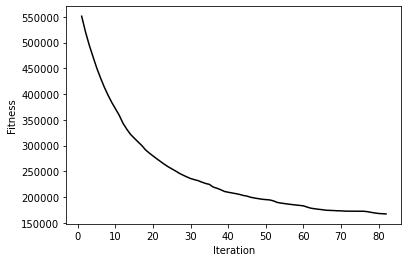

In [3]:
from copy import copy
import networkx as nx
import numpy as np
from numpy.linalg import norm
import re
import random
import sys
import matplotlib.pyplot as plt

instance= open("pr76.tsp", 'r')
coord_section = False
points = {}
G = nx.Graph()
for line in instance.readlines():

    if re.match('NODE_COORD_SECTION.*', line):
        coord_section = True
        continue
    elif re.match('EOF.*', line):
        break

    if coord_section:
        coord = " ".join(line.split())
        coord = coord.split(' ')
        index = int(coord[0])
        x_coordinate = float(coord[1])
        y_coordinate = float(coord[2])
        points[index] = (x_coordinate, y_coordinate)
        G.add_node(index, pos=(x_coordinate, y_coordinate))

def get_euclidean_distance(p, q):
    return norm(np.array(p) - np.array(q))

distance_matrix = []
for _, target_coordinates in points.items():
  distances = []
  for _, coordinates in points.copy().items():
    distances.append(get_euclidean_distance(target_coordinates, coordinates))
  distance_matrix.append(distances)
  
def get_random_soln(distance_matrix):
    size = len(distance_matrix)
    tour = list(range(size))
    random.shuffle(tour)
    return(tour)

def path_length(distance_matrix, soln):

  length = 0
  for dist in range(len(soln)):
    length = length + distance_matrix[soln[dist-1]][soln[dist]]
  return length

def find_neighbors(soln):
  neighbors = []
  for i in range(len(soln)): 
    for j in range(i+1,len(soln)):
      temp = soln.copy()
      temp[i] = soln[j]
      temp[j] = soln[i]
      neighbors.append(temp)
  return neighbors
soln = get_random_soln(distance_matrix)

def find_best_neighbor(distance_matrix , neighbors):
  best_neighbor_length = path_length(distance_matrix, neighbors[0]) 
  best_neighbor = neighbors[0]

  for neighbor in neighbors:
    current_length = path_length(distance_matrix , neighbor)
    if current_length < best_neighbor_length :
      best_neighbor_length = current_length
      best_neighbor = neighbor
  
  return best_neighbor, best_neighbor_length
  
def hill_climbing(distance_matrix):
  
  all_paths = []
  current_soln = random_output= get_random_soln(distance_matrix) 
  current_path_length = path_length(distance_matrix, current_soln)
  print(f'Random search path length : ',current_path_length)
  neighbors = find_neighbors(soln)
  best_neighbor , best_neighbor_length = find_best_neighbor(distance_matrix , neighbors)

  while best_neighbor_length < current_path_length :
    current_path_length = best_neighbor_length
    all_paths.append(current_path_length)
    current_soln = best_neighbor
    neighbors = find_neighbors(current_soln)
    best_neighbor , best_neighbor_length = find_best_neighbor(distance_matrix , neighbors)

  return current_soln , current_path_length, all_paths, random_output
  
def plot_graph(all_paths):
  iteration = []
  for path in range(1,len(all_paths)+1):
    iteration.append(path)
  plt.plot(iteration, all_paths, color='black');
  
best_soln, best_cost , all_paths, random_output= hill_climbing(distance_matrix) 
print(f"Hill climbing route length : ",best_cost)
output=[]

for i in range(len(best_soln)):
  output.append(str(best_soln[i]+1))
file_output="\n".join(output)
f = open("solutions.csv", "w")
f.write(file_output)
f.close()
plot_graph(all_paths)
plt.xlabel("Iteration")
plt.ylabel("Fitness")

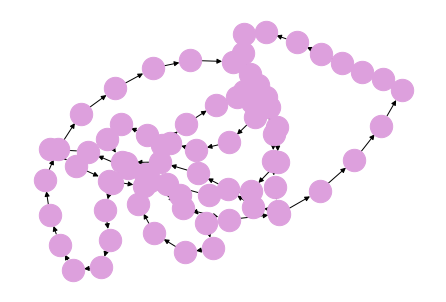

In [4]:
def graph(coordinate):
    G = nx.DiGraph()
    G.add_nodes_from(coordinate)
    temp = coordinate    
    for i in range(1, len(coordinate)):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])

    nx.draw(G, with_labels = False, node_color = 'plum', node_size = 500)
    return
x=[]

for i in range(0,len(output)):
  x.append(points[int(output[i])])
graph(x)